# Vectorized `astropy.coordinates.AltAz` Computation 

Brett Morris, May 12, 2015.

The [astropy docs on `SkyCoord`](http://astropy.readthedocs.org/en/latest/coordinates/#getting-started) say: 


> SkyCoord and all other coordinates objects also support array coordinates. These work the same as single-value coordinates, but they store multiple coordinates in a single object. When you’re going to apply the same operation to many different coordinates (say, from a catalog), this is a better choice than a list of SkyCoord objects, because it will be much faster than applying the operation to each SkyCoord in a for loop.


Here's an example demonstrating this, adapted from [astropy docs example for Observation Planning](http://astropy.readthedocs.org/en/latest/coordinates/observing-example.html#example-observation-planning).

In [43]:
import numpy as np
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

# Resolve coordinates
m33 = SkyCoord.from_name('M33')

# Set up Earth observer
bear_mountain = EarthLocation(lat=41.3*u.deg, lon=-74*u.deg, height=390*u.m)

# Set time of observation
utcoffset = -4*u.hour  # Eastern Daylight Time
time = Time('2012-7-12 23:00:00') - utcoffset

# Compute alt/az from RA+Dec+time+location
m33altaz = m33.transform_to(AltAz(obstime=time, location=bear_mountain))  
print("M33's Altitude = {0.alt:.2}".format(m33altaz))

midnight = Time('2012-7-13 00:00:00') - utcoffset

Nelements = 10**np.arange(5)
times = np.zeros(len(Nelements))
for i, N in enumerate(Nelements):
    delta_midnight = np.linspace(-2, 7, N)*u.hour
    print('For {0} element(s):'.format(N))
    
    # Use the iPython %timeit magic to measure best computation time
    # for each number of elements (can't use line break in magic func)
    t = %timeit -o m33.transform_to(AltAz(obstime=midnight+delta_midnight,location=bear_mountain))
    times[i] = t.best

M33's Altitude = 0.13 deg
For 1 element(s):
10 loops, best of 3: 70.3 ms per loop
For 10 element(s):
10 loops, best of 3: 70.3 ms per loop
For 100 element(s):
10 loops, best of 3: 98.3 ms per loop
For 1000 element(s):
1 loops, best of 3: 342 ms per loop
For 10000 element(s):
1 loops, best of 3: 2.8 s per loop


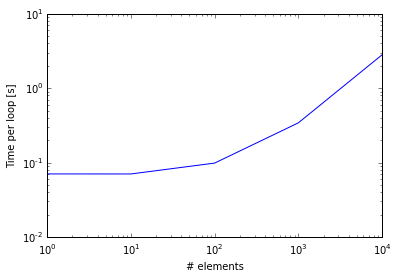

In [47]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.loglog(Nelements, times)
plt.xlabel('# elements')
plt.ylabel('Time per loop [s]')
plt.show()

**Fig**: The runtime scales faster than linearly with the number of elements, so seems to be vectorized.